In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [3]:
epoch = 1
batch_size = 50
lr = 1e-3
download_mnist = True

In [4]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform = torchvision.transforms.ToTensor(),
    download=download_mnist
    
)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


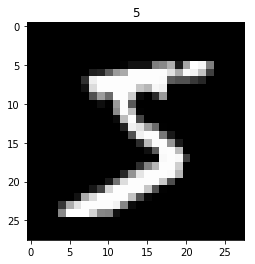

In [5]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [6]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = torchvision.datasets.MNIST(root='./mnist/',train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels = 16,
                kernel_size = 5,
                stride=1,
                padding=2
                
                ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.out = nn.Linear(32* 7 *7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0),-1)
        output = self.out(x)
        return output, x
        

In [8]:
cnn = CNN()

In [9]:
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [10]:
optimizer = torch.optim.Adam(cnn.parameters(),lr =lr)
loss_func = nn.CrossEntropyLoss()

In [11]:
from matplotlib import cm
try: 
    from sklearn.manifold import TSNE
    HAS_SK = True
except:HAS_SK = False; print('install sklearn')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X,Y = lowDWeights[:,0],lowDWeights[:,1]
    for x,y,s in zip(X,Y,labels):
        c = cm.rainbow(int(255* s/9))
        plt.text(x,y,s,backgroundcolor=c,fontsize=9)
        
    plt.xlim(X.min(),X.max())
    plt.ylim(Y.min(),Y.max())
    plt.title('Visualize last layers')
    plt.show()

Epoch:  0 | Train Loss: 2.3105  | Test Accuracy: 0.06


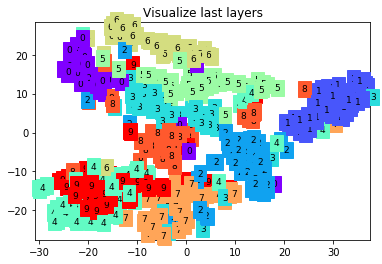

Epoch:  0 | Train Loss: 0.1290  | Test Accuracy: 0.87


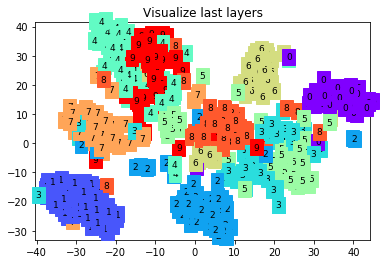

Epoch:  0 | Train Loss: 0.4058  | Test Accuracy: 0.93


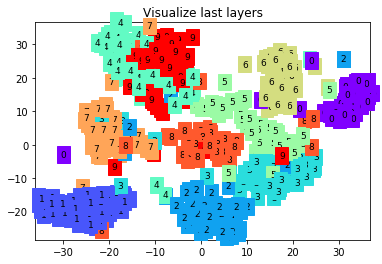

Epoch:  0 | Train Loss: 0.1956  | Test Accuracy: 0.94


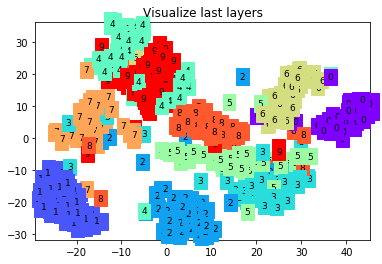

Epoch:  0 | Train Loss: 0.1238  | Test Accuracy: 0.96


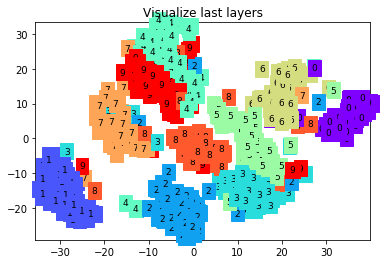

Epoch:  0 | Train Loss: 0.2217  | Test Accuracy: 0.96


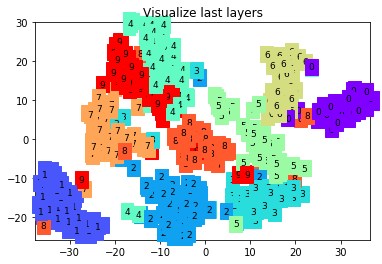

Epoch:  0 | Train Loss: 0.0237  | Test Accuracy: 0.97


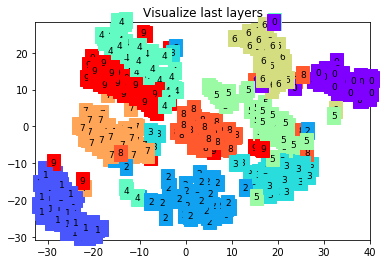

Epoch:  0 | Train Loss: 0.2158  | Test Accuracy: 0.97


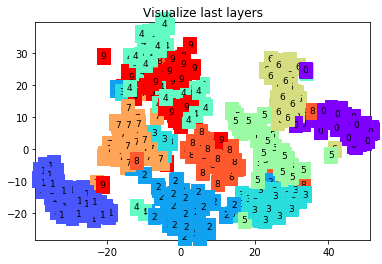

Epoch:  0 | Train Loss: 0.0433  | Test Accuracy: 0.97


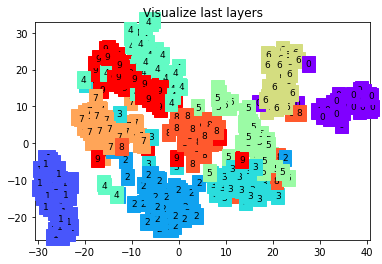

Epoch:  0 | Train Loss: 0.0564  | Test Accuracy: 0.98


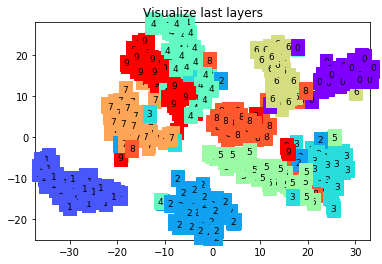

Epoch:  0 | Train Loss: 0.0320  | Test Accuracy: 0.98


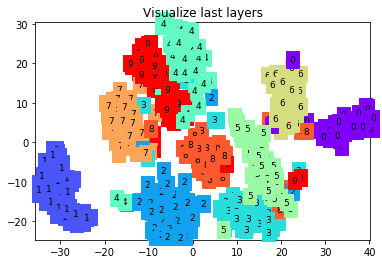

Epoch:  0 | Train Loss: 0.0233  | Test Accuracy: 0.98


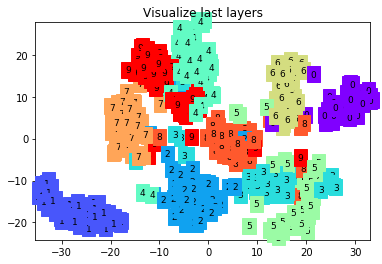

In [12]:
for epoch in range(epoch):
    
    for step , (x,y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 ==0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ',epoch, '| Train Loss: %.4f' % loss.item(),
                 ' | Test Accuracy: %.2f' % accuracy)
            if HAS_SK:
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only= 500
                low_dims_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only,:])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dims_embs, labels)


In [15]:
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
